In [12]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

**I generate 440 Hz for 10 milisec and I plot it and see a sine wave**

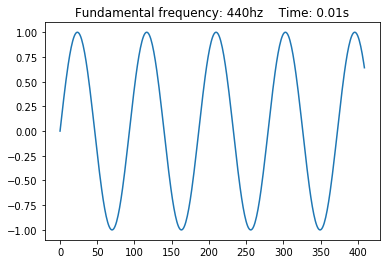

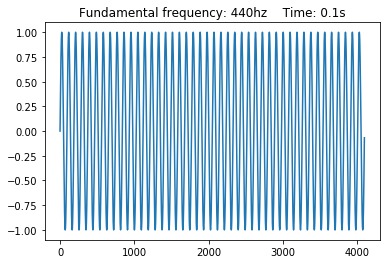

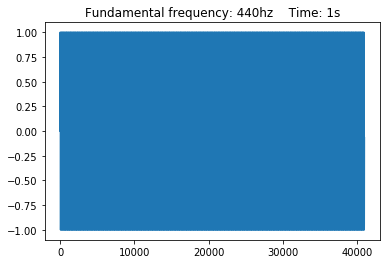

In [44]:

def create_sinwave(t):
    fs = 41000 # sampling frequency
    f = 440 # Enter fundamental frequency: default at 440 hz
    samples = np.arange(t * fs) / fs
    sil = np.sin(2 * np.pi * f * samples)
    return sil

t0 = 0.01
t1 = 0.1 # Enter duration of signal (in seconds): default at 0.1s
t2 = 1

sil0 = create_sinwave(t0)
sil1 = create_sinwave(t1)
sil2 = create_sinwave(t2)


plt.plot(sil0)
plt.title('Fundamental frequency: 440hz    Time: 0.01s')
plt.show()

plt.plot(sil1)
plt.title('Fundamental frequency: 440hz    Time: 0.1s')
plt.show()

plt.plot(sil2)
plt.title('Fundamental frequency: 440hz    Time: 1s')
plt.show()

**I plot the spectrogram and see a line at 440 Hz**

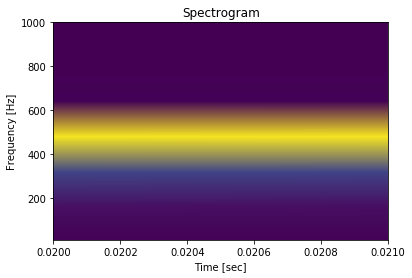

In [64]:
fs = 41000 # sampling frequency

f_funl = 440 # Enter fundamental frequency: default at 440 hz
t = 1 # Enter duration of signal (in seconds): default at 0.1s

samples = np.arange(t * fs) / fs
sil = np.sin(2 * np.pi * f_funl * samples)

f, t, Sxx = signal.spectrogram(sil, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

# Zoom in: x_min = 0.02, x_max = 0.021
#          y_min = 10, y_max = 1000
plt.xlim(0.02, 0.021)   
plt.ylim(10, 1000)
plt.title('Spectrogram')
plt.show()

**I plot a wavelet and see the same line at 440 Hz**

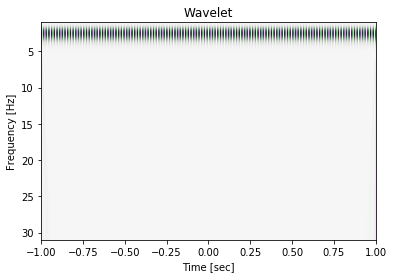

In [66]:
widths = np.arange(1, f_funl)
cwtmatr = signal.cwt(sil, signal.ricker, widths)
plt.imshow(cwtmatr, extent=[-1, 1, 31, 1], cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Wavelet')
plt.show()